# 1차 미니 프로젝트(1일차) 

## 목표:  머신러닝을 위한 데이터 전처리시전남 전북  


### 1. 나이대 MZ 구분   feature 추가  : M / Z / X / 베이비붐  / 시니어

In [1]:
# pyplot 한글 입력 깨지지않도록 업그레이드 
!pip install matplotlib
!pip install --upgrade matplotlib


# 라이브러리 불러오기 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# 데이터 불러오기
customers = pd.read_csv('customers.csv')
sales = pd.read_csv('sales.csv')
products = pd.read_csv('products.csv')



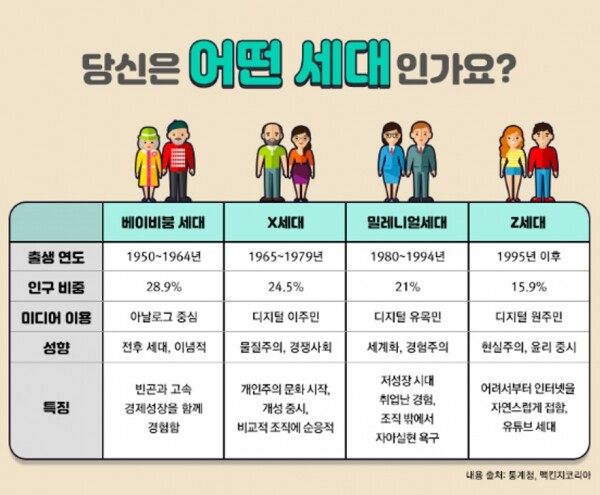

출처: https://kostat.go.kr/boardDownload.es?bid=11918&list_no=417488&seq=1 

### Feature  Generation 추가 

In [4]:
# 고객의 나이대를 통계청에서 제공한 분류 기준으로 구분 

def categorize_generation(year): # 함수 생성   
    if year <= 1950:
        return 'Serior'
    elif 1950 < year <= 1964:
        return 'Baby_boomer'
    elif 1965 <= year <= 1979:
        return 'X'
    elif 1980 <= year <= 1994:
        return 'M'
    else:  # 1995 < year
        return 'Z'
 

# 'Generarion' 열 추가
customers['Generation'] = customers['BirthYear'].apply(categorize_generation)
customers['Generation'].value_counts()


Generation
X              1367
M               405
Baby_boomer     381
Serior           88
Z                 2
Name: count, dtype: int64

### Generation 별로 구매량 , 구매품목  확인 

In [116]:
#데이터 형식 확인
print(customers.head())
print(sales.head())
print(products.head())

  CustomerID RegisterDate Gender  BirthYear Addr1 Addr2   Generation
0    c328222   2014-09-25      F       1960   강원도   원주시  Baby_boomer
1    c281448   2013-06-18      F       1974   강원도   원주시            X
2    c038336   2003-10-10      F       1968   강원도   춘천시            X
3    c084237   2007-03-09      F       1982   강원도   강릉시            M
4    c162600   2010-06-14      F       1978   강원도   속초시            X
   OrderID  Seq   OrderDate ProductID  Qty   Amt CustomerID
0      107    2  2016-01-02  p1036481    2  2100    c150417
1       69    1  2016-01-02  p1152861    1  1091    c212716
2       69    7  2016-01-02  p1013161    1  2600    c212716
3       69    8  2016-01-02  p1005771    1  1650    c212716
4       69   11  2016-01-02  p1089531    1  2600    c212716
  ProductID ProductName Category SubCategory
0  p1052661         새우깡       간식          과자
1  p1054261       고구마스틱       간식          과자
2  p1097821          짱구       간식          과자
3  p1097831         감자칩       간식          과자
4

### sales , products, customer  데이터프레임 병합

In [5]:
# sales 와 products 합병
temp1 = pd.merge(sales,products , on ='ProductID',how='left')

# sales 와 합병 
temp2 = pd.merge(temp1,customers , on ='CustomerID',how='left')

# sales , product , Customer_gen 을 모두 합친 temp2 데이터 프레임 확인 
temp2

,OrderID,Seq,OrderDate,ProductID,Qty,Amt,CustomerID,ProductName,Category,SubCategory,RegisterDate,Gender,BirthYear,Addr1,Addr2,Generation
0,107,2,2016-01-02,p1036481,2,2100,c150417,순두부,반찬류,두부,2010-03-03,F,1974,경기도,성남시,X
1,69,1,2016-01-02,p1152861,1,1091,c212716,포토아이스크림,유제품,아이스크림,2011-10-24,F,1981,경기도,용인시,M
2,69,7,2016-01-02,p1013161,1,2600,c212716,느타리버섯,채소,버섯,2011-10-24,F,1981,경기도,용인시,M
3,69,8,2016-01-02,p1005771,1,1650,c212716,두부_소,반찬류,두부,2011-10-24,F,1981,경기도,용인시,M
4,69,11,2016-01-02,p1089531,1,2600,c212716,감자칩,채소,뿌리채소,2011-10-24,F,1981,경기도,용인시,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70007,53,4,2017-03-31,p1072601,1,4600,c337999,우유1000,유제품,우유,2015-01-12,F,1977,인천광역시,계양구,X
70008,53,6,2017-03-31,p1178011,1,8800,c337999,사과_소,과일,과수,2015-01-12,F,1977,인천광역시,계양구,X
70009,55,6,2017-03-31,p1054261,1,2091,c088320,고구마스틱,간식,과자,2007-05-12,F,1976,경기도,광명시,X
70010,59,4,2017-03-31,p1175481,1,1300,c238056,콩나물,반찬류,나물류,2012-08-07,F,1977,서울특별시,동작구,X


# 데이터 파악 및 시각화 ( 참고만 해주세요! )

c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

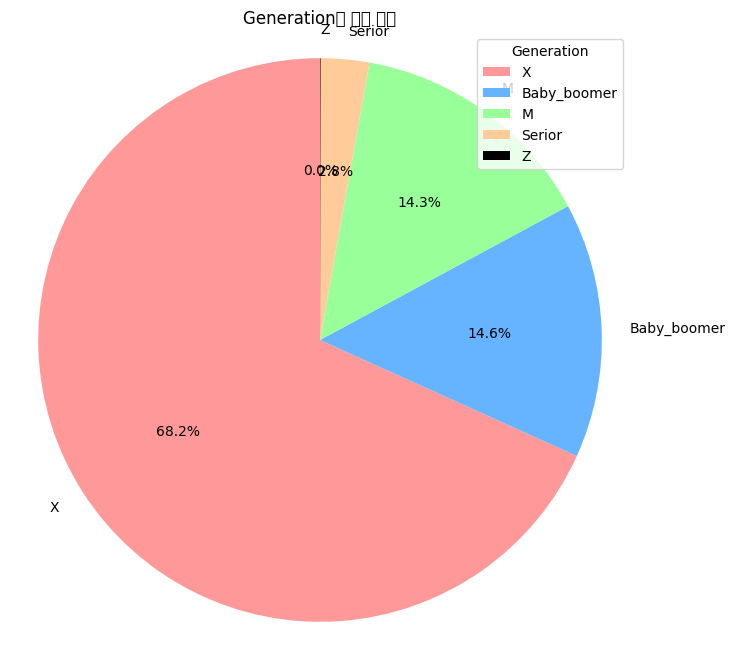

In [6]:
# Generation별 구매 횟수 계산
generation_counts = temp2['Generation'].value_counts()

# 파이차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(generation_counts, labels=generation_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','000000'])

# 그래프 꾸미기
plt.title('Generation별 구매 비율')
plt.axis('equal')  # 파이를 동그랗게 표시
plt.legend(title='Generation', loc='upper right')
plt.show()

<BarContainer object of 5 artists>

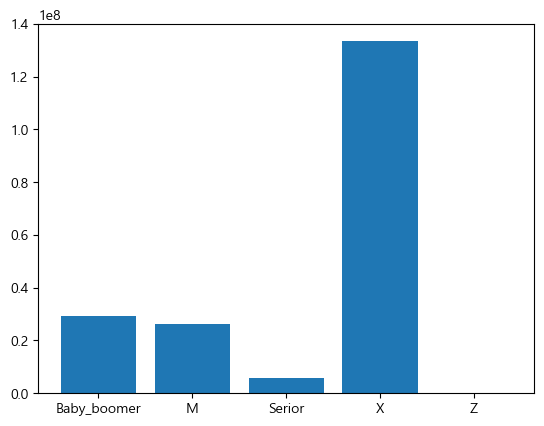

In [10]:
# 판매량 Amt  을 'Generation' 세대별  구매량을 시각화 
Sales_gen = temp2.groupby(by='Generation',as_index= False)['Amt'].sum()
# 시각화 

plt.bar(x=Sales_gen['Generation'], height = Sales_gen['Amt'])

- 고객 구매 영수증에서 X 세대가 68.2% 가장 많은 비율을 차지하기 때문에 세대별 매출액도 X세대가 가장 많음 

In [11]:
# 구매 품목 별로 더 세분화
grouped = temp2.groupby(by= ['Generation', 'Category'], as_index =False ).size().reset_index(drop = True)

grouped

,Generation,Category,size
0,Baby_boomer,간식,724
1,Baby_boomer,과일,861
2,Baby_boomer,반찬류,3126
3,Baby_boomer,유제품,1414
4,Baby_boomer,채소,4117
5,M,간식,1290
6,M,과일,916
7,M,반찬류,1946
8,M,유제품,2262
9,M,채소,3607


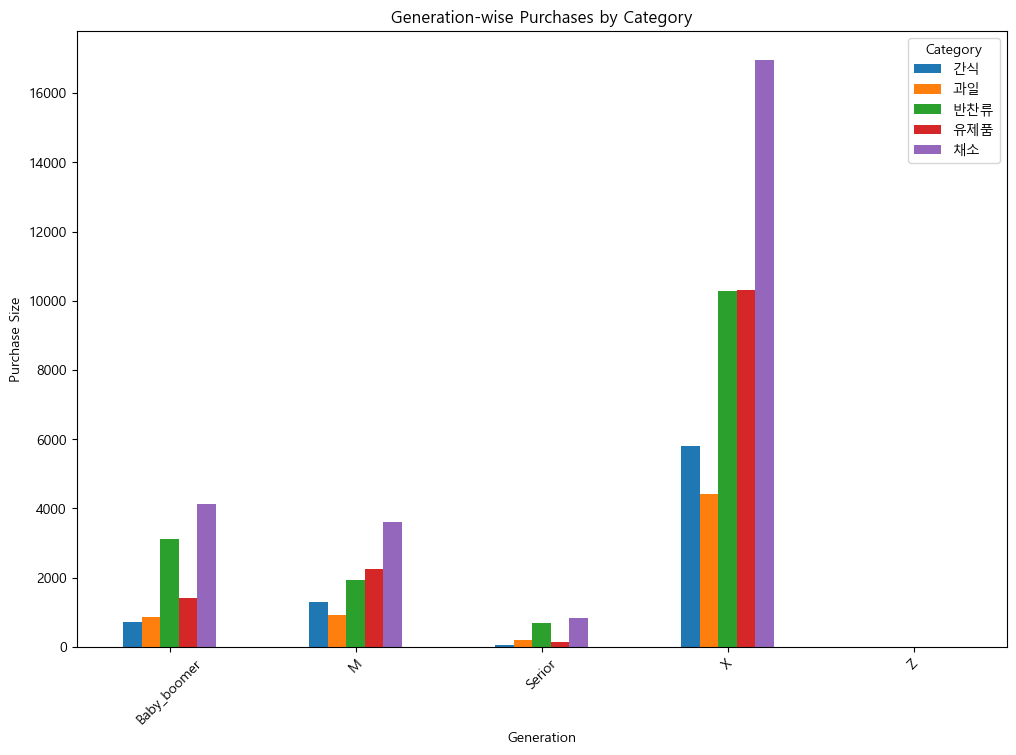

In [12]:
df = pd.DataFrame(grouped)

# 피벗 테이블로 변환: 세대별 각 카테고리의 size 값을 피벗
pivot_df = df.pivot(index='Generation', columns='Category', values='size')

# 막대 그래프 그리기
pivot_df.plot(kind='bar', figsize=(12, 8))

# 한글 폰트 설정 (윈도우에서는 'Malgun Gothic', MacOS에서는 'AppleGothic')
plt.rcParams['font.family'] = 'Malgun Gothic'  # 또는 'AppleGothic' (Mac 사용 시)
# 유니코드에서 마이너스 기호(-)가 깨지는 경우 방지

plt.rcParams['axes.unicode_minus'] = False
# 그래프 꾸미기
plt.title('Generation-wise Purchases by Category')
plt.xlabel('Generation')
plt.ylabel('Purchase Size')
plt.xticks(rotation=45)  # 세대 레이블 45도 회전
plt.legend(title='Category')


Q. 왜 X 세대 고객들은 채소를 많이 샀을까?

가설1. X 세대는 2016년도 기준  40 ~50대 입니다. 결혼했고 자녀들이 있어서 마트에서 구매량이 많기 때문 
        특히 x세대의 식습관도 영향이 있을것이라 생각 
